In [37]:
# !pip install pandas
# !pip install numby
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

In [38]:
import numpy as nu
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("autoscout24-germany-dataset.csv") #اتسدعاء ملف الداتا سيت

In [ ]:
df.head() #طباعه اول 5 صفوف من الداتا سيت

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [ ]:
df.tail() #طباعه اخر 5 صفوف من الداتا سيت

,mileage,make,model,fuel,gear,offerType,price,hp,year
10617,121249,Renault,Megane,Diesel,Manual,Used,7290,110.0,2015
10618,52800,smart,forTwo,Electric,Automatic,Used,7290,48.0,2015
10619,75000,Opel,Meriva,Diesel,Manual,Used,7300,110.0,2015
10620,58500,Citroen,C1,Gasoline,Manual,Used,6980,69.0,2016
10621,47670,Opel,Corsa,Gasoline,Manual,Used,6980,69.0,2016


In [ ]:
df.info() #طباعه معلومات عن الداتا سيت

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10622 entries, 0 to 10621
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    10622 non-null  int64  
 1   make       10622 non-null  object 
 2   model      10597 non-null  object 
 3   fuel       10622 non-null  object 
 4   gear       10589 non-null  object 
 5   offerType  10622 non-null  object 
 6   price      10622 non-null  int64  
 7   hp         10615 non-null  float64
 8   year       10622 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 747.0+ KB


In [ ]:
df.describe() #وصف الداتا سيت

,mileage,price,hp,year
count,10622.000000,10622.000000,10615.000000,10622.000000
mean,71438.565336,15520.351346,126.554027,2015.997741
std,63439.234109,17923.804906,72.482352,3.152944
min,0.000000,3299.000000,1.000000,2011.000000
25%,19800.000000,7490.000000,82.000000,2013.000000
50%,59296.500000,9947.500000,109.000000,2016.000000
75%,105000.000000,14990.000000,150.000000,2019.000000
max,527205.000000,449900.000000,770.000000,2021.000000


In [ ]:
df.isnull().sum() #حساب القيم الغير موجوده

mileage       0
make          0
model        25
fuel          0
gear         33
offerType     0
price         0
hp            7
year          0
dtype: int64

In [ ]:
df = df.dropna(subset=['model', 'gear','hp']) #حذف القيم الغير موجوده من الداتا سيت
print(df.isnull().sum()) #حساب القيم الغير موجوده

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64


In [ ]:
df.shape #عدد الصفوف والاعمده

(10559, 9)

In [ ]:
df.duplicated().sum() #القيم المكرره

np.int64(503)

In [ ]:
df = df.drop_duplicates() #حذف القيم المكرره

In [ ]:
df.duplicated().sum() #حساب القيم المكرره

np.int64(0)

In [ ]:
df["price"] = pd.to_numeric(df["price"], errors="coerce") #تحويل قيمه ال price الي int
df["hp"] = pd.to_numeric(df["hp"], errors="coerce") #تحويل قيمه ال hp الي int

In [ ]:
df['mileage'] = df["mileage"].astype(int)
df["price"] = df["price"].astype(int)
df["hp"] = df["hp"].astype(int)
df["year"] = df["year"].astype(int)
#التاكد ان جميع الصفوف قيمها ارقام

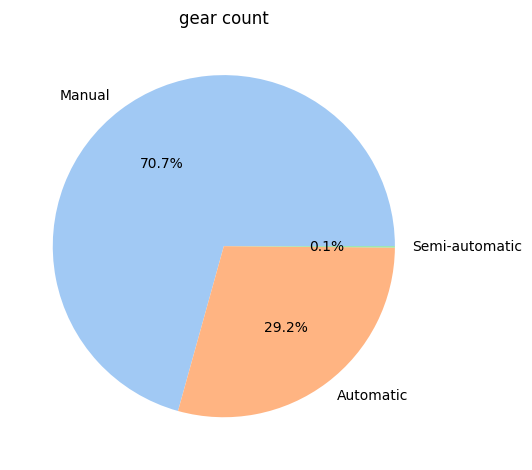

In [ ]:
fuel_count = df["gear"].value_counts()
plt.title("gear count")
plt.pie(fuel_count,labels=fuel_count.index,autopct='%1.1f%%',colors=sns.color_palette("pastel"))
plt.tight_layout()
plt.show()
#توزيع قيمه ال gear

C:\Users\ao938\AppData\Local\Temp\ipykernel_15080\1850813615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cars_price.values, y=top_cars_price.index, palette='Reds_r')


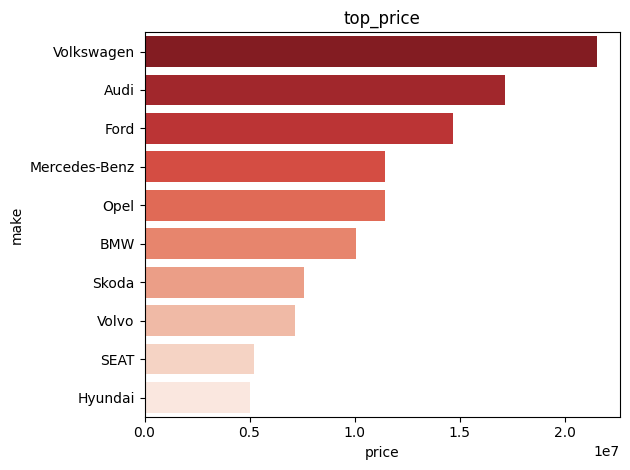

In [ ]:
top_cars_price = df.groupby("make")["price"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_cars_price.values, y=top_cars_price.index, palette='Reds_r')
plt.title('top_price')
plt.xlabel("price")
plt.ylabel("make")
plt.tight_layout()
plt.show()
#اعلي 10 اسعار انواع سيارات

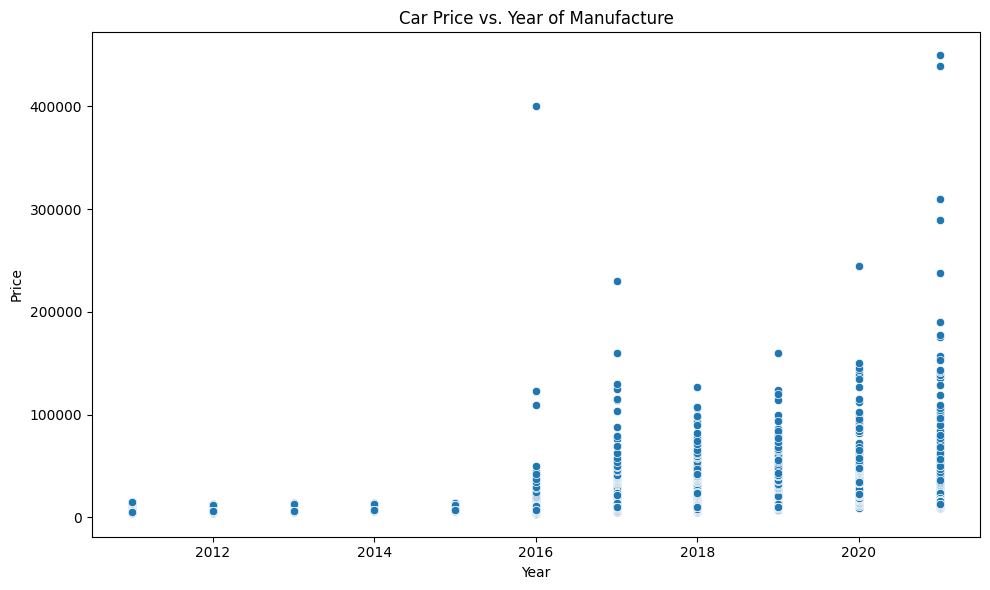

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=df)
plt.title('Car Price vs. Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Price')
plt.tight_layout()
plt.show()
#اسعار السيارات بالنسبه لسنه التصنيع

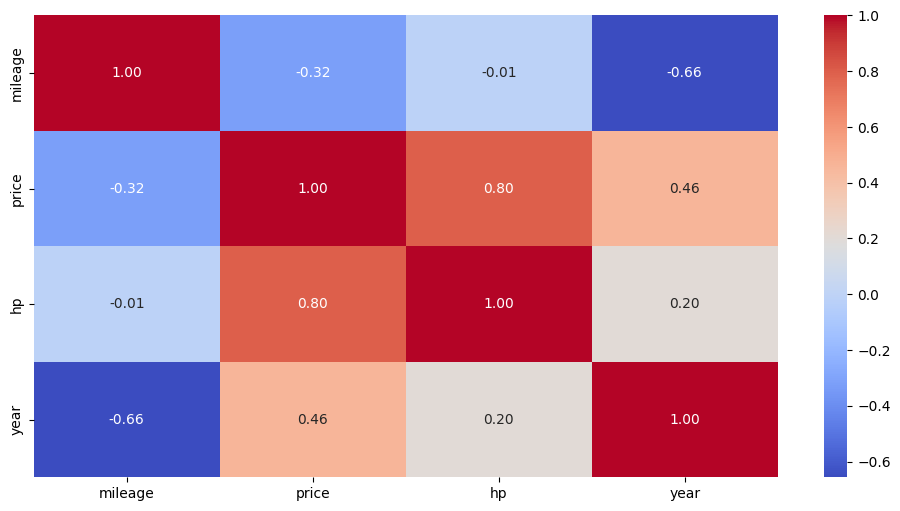

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()
#قوه الترابط بين الصفوف وبعضها

In [ ]:
df['model'] = df['model'].astype('category').cat.codes #تحويل صف ال ةخيثم الي ارقام فريده
df['offerType'] = df['offerType'].astype('category').cat.codes #تحويل صف ال offerType الي ارقام فريده

In [ ]:
ml = df[['model', 'hp', 'year', 'mileage','offerType']]
target = df['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ml, target, test_size=0.3, random_state=537)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# تحديد وتجهيز البيانات وتقسيمها لاختيار الجروزم مناسب للتنبؤ بالاسعار 


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

models = {
        'RandomForestRegressor':RandomForestRegressor()
}


for name,model in models.items():
    if name in ['S','KNeighbors']:
        model.fit(x_train_scaled,y_train)
        y_pred = model.predict(x_test_scaled)
    else:
         model.fit(x_train,y_train)
         y_pred = model.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    print(f"Accuracy: {r2:.2%}") 
    # RandomForestRegressorطباعه دقه النموزج باستخدام الجروزم 
    

Accuracy: 91.76%
